# EAS 4610 - Earth Systems Modeling - Final Project
## Landscape Evolution - Terrain Change Model
### By: Carson Clements, Maci Harrell, Kevin Lu
### Due: Tuesday, December 5th at 11:59 PM ET
### Requirements/Rubric: https://gatech.instructure.com/courses/321828/assignments/1404688
### Original Paper (Landscape Evolution, Willgoose 2004): https://www.annualreviews.org/doi/pdf/10.1146/annurev.earth.33.092203.122610

In [101]:
# Import libraries 

import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import random

seed(1)

In [102]:
# Parameters
L = 10.0  # Length of the domain
T = 5.0   # Total simulation time
Nx = 100   # Number of spatial grid points
Nt = 500   # Number of time steps
dx = L / (Nx - 1)
dt = T / Nt
massIn = 0.1*random()
massOut = 0.1*random()
lamb = 0.001 # the rate of occurrence of entrainment (detachment) events per unit area per unit time
mass = 100 + massIn - massOut # the average mass of sediment entrained per entrainment event
travel = 0.1*L*random() # the average travel distance of the entrained sediment - uncertain value
print(massIn)
print(massOut)
print(travel)

0.013436424411240122
0.08474337369372327
0.763774618976614


In [103]:
# Advection and diffusion coefficients
u = 0.1*random()   # Advection velocity - representation of the transport/shifting of landscape downwind over time
D = lamb*mass*travel  # Diffusion coefficient - equivalent to Qs
print(u)
print(D)

0.02550690257394217
0.07632299945964278


In [104]:
# Initial condition with square peak
R_initial = np.zeros(Nx)
R_initial[int(0.4 * Nx):int(0.6 * Nx)] = 1.0  # Initial regolith distribution

# # Initial condition with square peak
# Hill_Width_Constant = 10
# Hill_Peak = 10

# R_initial = np.zeros(Nx)
# X = np.arange(0, Nx, 1)
# R_initial = (np.exp(-((X-(0.5*Nx))**2)/Hill_Width_Constant))*Hill_Peak
# #R_initial[int(0.4 * Nx):int(0.6 * Nx)] = 1.0  # Initial regolith distribution

# # Initial condition with a sharp peak
# peak_position = 0.5 * L
# peak_width = 0.1 * L
# x_values = np.linspace(0, L, Nx)
# R_initial = np.exp(-(x_values - peak_position)**2 / (2 * peak_width**2))

In [105]:
# Testing Regolith Distribution Cell
# R_initial[int(0.4 * Nx):int(0.41 * Nx)] = 0.5  # Initial regolith distribution
# R_initial[int(0.41 * Nx):int(0.42 * Nx)] = 0.55  # Initial regolith distribution
# R_initial[int(0.42 * Nx):int(0.43 * Nx)] = 0.6  # Initial regolith distribution
# R_initial[int(0.43 * Nx):int(0.44 * Nx)] = 0.65  # Initial regolith distribution
# R_initial[int(0.44 * Nx):int(0.45 * Nx)] = 0.7  # Initial regolith distribution
# R_initial[int(0.45 * Nx):int(0.46 * Nx)] = 0.75  # Initial regolith distribution
# R_initial[int(0.46 * Nx):int(0.47 * Nx)] = 0.8  # Initial regolith distribution
# R_initial[int(0.47 * Nx):int(0.48 * Nx)] = 0.85  # Initial regolith distribution
# R_initial[int(0.48 * Nx):int(0.49 * Nx)] = 0.9  # Initial regolith distribution
# R_initial[int(0.49 * Nx):int(0.50 * Nx)] = 1.0  # Initial regolith distribution
# R_initial[int(0.5 * Nx):int(0.51 * Nx)] = 1.0  # Initial regolith distribution
# R_initial[int(0.51 * Nx):int(0.52 * Nx)] = 0.9  # Initial regolith distribution
# R_initial[int(0.52 * Nx):int(0.53 * Nx)] = 0.85  # Initial regolith distribution
# R_initial[int(0.53 * Nx):int(0.54 * Nx)] = 0.8  # Initial regolith distribution
# R_initial[int(0.54 * Nx):int(0.55 * Nx)] = 0.75  # Initial regolith distribution
# R_initial[int(0.55 * Nx):int(0.56 * Nx)] = 0.7  # Initial regolith distribution
# R_initial[int(0.56 * Nx):int(0.57 * Nx)] = 0.65  # Initial regolith distribution
# R_initial[int(0.57 * Nx):int(0.58 * Nx)] = 0.6  # Initial regolith distribution
# R_initial[int(0.58 * Nx):int(0.59 * Nx)] = 0.55  # Initial regolith distribution
# R_initial[int(0.59 * Nx):int(0.60 * Nx)] = 0.5  # Initial regolith distribution

In [106]:
# Arrays to store the regolith depth at each grid point and time step
R = np.zeros((Nt, Nx))

# Set initial condition
R[0, :] = R_initial

In [107]:
# Set Dirichlet boundary conditions
R[:, 0] = R_initial[0]  # Left boundary
R[:, -1] = R_initial[-1]  # Right boundary

In [108]:
# Finite difference scheme for advection-diffusion equation with Dirichlet and Neumann boundary conditions
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        advection_term = u * (R[n, i + 1] - R[n, i - 1]) / (2 * dx)
        diffusion_term = D * (R[n, i + 1] - 2 * R[n, i] + R[n, i - 1]) / dx**2
        R[n + 1, i] = R[n, i] + dt * (diffusion_term - advection_term)

### Figures

In [109]:
# Plot the results with Dirichlet and Neumann boundary conditions
x_values = np.linspace(0, L, Nx)
time_values = np.linspace(0, T, Nt)

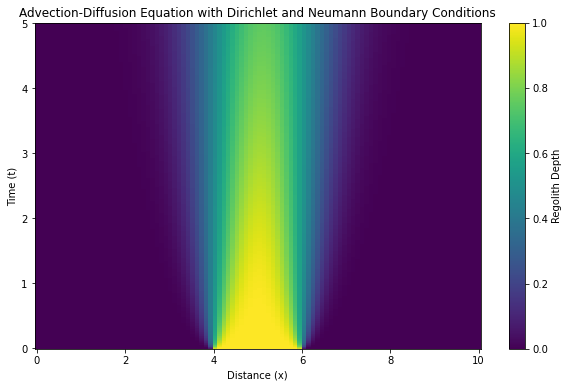

In [110]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
plt.xlabel('Distance (x)')
plt.ylabel('Time (t)')
plt.show()

In [111]:
# Plot the results with Dirichlet and Neumann boundary conditions
x_values = np.linspace(0, L, Nx)
time_values = np.linspace(0, T, Nt)

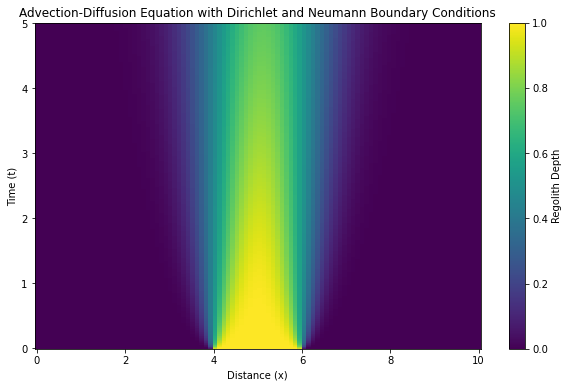

In [112]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
plt.xlabel('Distance (x)')
plt.ylabel('Time (t)')
plt.show()

In [113]:
# Plot the results with Dirichlet and Neumann boundary conditions
x_values = np.linspace(0, L, Nx)
time_values = np.linspace(0, T, Nt)

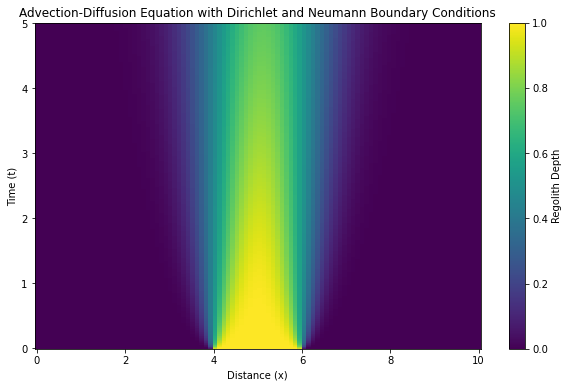

In [114]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
plt.xlabel('Distance (x)')
plt.ylabel('Time (t)')
plt.show()

In [115]:
# Plot the results with Dirichlet and Neumann boundary conditions
x_values = np.linspace(0, L, Nx)
time_values = np.linspace(0, T, Nt)

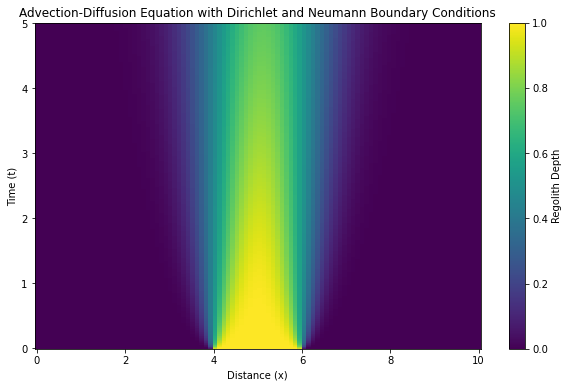

In [116]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
plt.xlabel('Distance (x)')
plt.ylabel('Time (t)')
plt.show()